In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.metrics import roc_curve, auc

In [5]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [6]:
bank_data.shape

(5000, 14)

data set has 5000 observations and 14 attributes out of which 'Personal Loan' is dependent variable.

In [7]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


data set has float and integer values 

In [9]:
bank_data.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'], dtype=object)

In [10]:
bank_data.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

data set has no missing values

In [11]:
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

there is no duplicate data in the data set

In [12]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


for most of the columns, mean is more than the median so data is not distributed normally.
the data set has customers of minimum age 23 years and maximum age of 67 yrs.
also there are customers with no work experience and maximum experience of 43 years.
the minimum income of the customers id 8 and maximum is 224 where as median is 64 which clearly indicates the existance of outliers.
minimum family size is 1 and maximum family size is 4.
minimum CCAvg of the customers is 0 and maximum is 10 where as median is 1.5 which clearly indicates the existance of outliers.
minimum Mortgage value is 0 and maximum is 635 where as median is 0 which clearly indicates the existance of outliers.
maximum credit cards that a customer has is 1.

In [13]:
# 'ID' is not necessary so we can drop it.
bank_data = bank_data.drop(['ID'], axis=1)

In [14]:
#lets check the distribution of all variables.
for i in bank_data.columns:
    print(bank_data[i].value_counts())

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Exp

customers below 30 years are few.
there are significant number of customers with more experience.
only 522 customers are of Securities Account
only 302 customers are of CD Account
half(2984) of the customers accounts are online
only one third (1470) of the customers has CreditCard

In [15]:
#lets check the distribution of target variable.
bank_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

4520 has not taken personal loan and 480 has taken personal loan

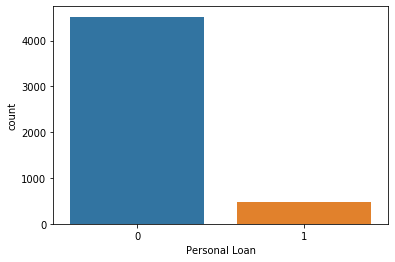

In [16]:
sns.countplot(x="Personal Loan", data=bank_data)

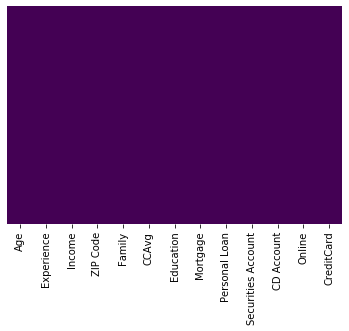

In [17]:
# Data visualization
#checking missing values
sns.heatmap(bank_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

dataset has no missing values

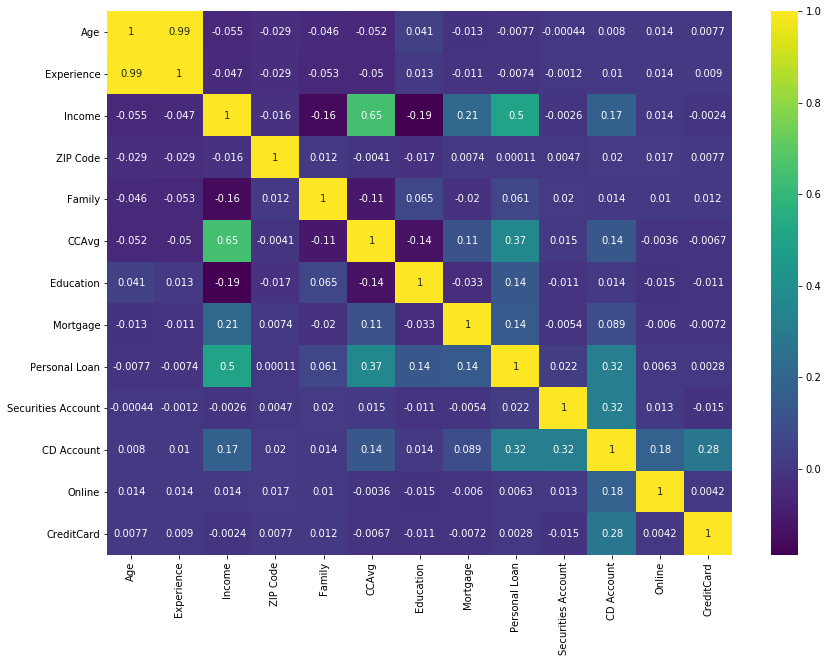

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(bank_data.corr(),cmap='viridis',annot=True) 

In [19]:
#'Age' and 'Experience' are strongly correlated hence we can drop 'Age' column
bank_data = bank_data.drop('Age', axis=1)

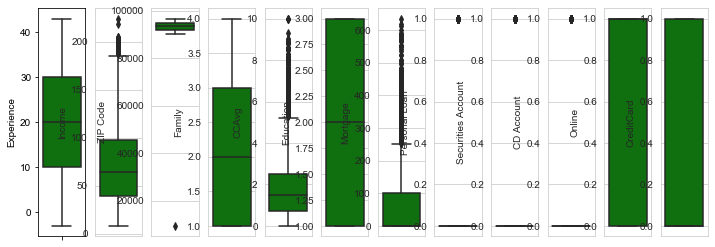

In [20]:
l = bank_data.columns.values
number_of_columns=len(l)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    if bank_data[l[i]].dtypes != object:
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(bank_data[l[i]],color='green',orient='v')

columns 'Mortagage', 'CCAvg' and 'Income' has outliers

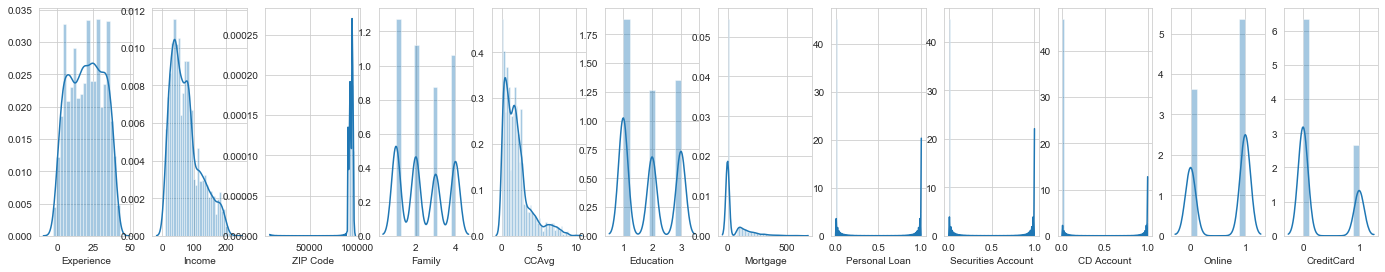

In [21]:
#To check distribution-Skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    if bank_data[l[i]].dtype != object:
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.distplot(bank_data[l[i]], kde=True) 

In [22]:
X = bank_data.drop('Personal Loan', axis=1)
y = bank_data['Personal Loan']

In [23]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
Xscaled = X.apply(zscore)
Xscaled.describe()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [24]:
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [25]:
# Call Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(Xscaled_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [26]:
print('With KNN (K=3) accuracy on train data is: ',NNH.score(Xscaled_train,y_train)) # accuracy

With KNN (K=3) accuracy on train data is:  1.0


In [27]:
predictied = NNH.predict(Xscaled_test)

In [28]:
print('With KNN (K=3) accuracy on test data is: ',NNH.score(Xscaled_test,y_test)) # accuracy

With KNN (K=3) accuracy on test data is:  0.894


In [29]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Xscaled_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(Xscaled_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(Xscaled_test, y_test))


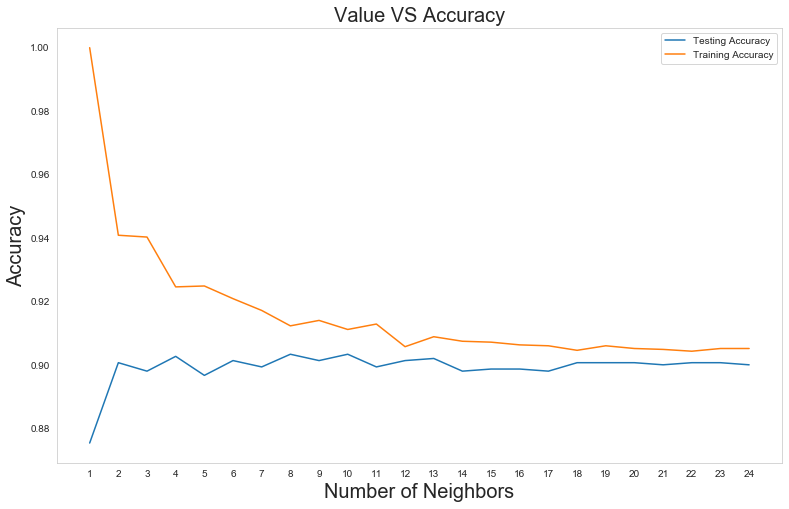

Best accuracy is 0.9033333333333333 with K = 8


In [30]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [31]:
metrics.confusion_matrix(predictied, y_test)

array([[1307,  115],
       [  44,   34]], dtype=int64)

In [32]:
pd.DataFrame(data=[accuracy_score(y_test, predictied), recall_score(y_test, predictied, average= 'weighted'), precision_score(y_test, predictied, average= 'weighted'), f1_score(y_test, predictied, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])

,0
accuracy,0.894000
recall,0.894000
precision,0.871127
f1_score,0.878780


In [71]:
y_predictProb = NNH.predict_proba(Xscaled_test)

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8107094421730858

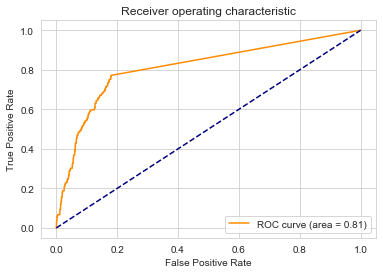

In [73]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [33]:
# logistic regression
lrmodel = LogisticRegression()

In [34]:
lrmodel.fit(Xscaled_train, y_train)

C:\Users\swathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
print('logistic regression model accuracy on train data is: ',lrmodel.score(Xscaled_train,y_train))

logistic regression model accuracy on train data is:  0.9091428571428571


In [36]:
print('logistic regression model accuracy on test data is: ',lrmodel.score(Xscaled_test,y_test))

logistic regression model accuracy on test data is:  0.9073333333333333


In [37]:
y_predict = lrmodel.predict(Xscaled_test)

In [38]:
metrics.confusion_matrix(y_predict, y_test)

array([[1318,  106],
       [  33,   43]], dtype=int64)

In [39]:
sum(y_test)

149

In [40]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), 
                   recall_score(y_test, y_predict, average= 'weighted'), 
                   precision_score(y_test, y_predict, average= 'weighted'),
                   f1_score(y_test, y_predict, average= 'weighted')], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.907333
recall,0.907333
precision,0.889824
f1_score,0.893520


In [68]:
y_predictProb = lrmodel.predict_proba(Xscaled_test)

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9156727057759849

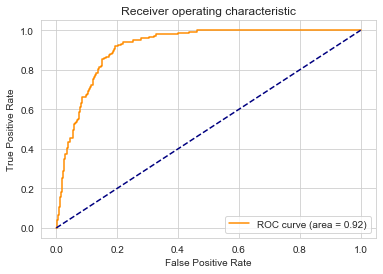

In [70]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [41]:
# Naive bayes alogorithm
nbmodel = GaussianNB()

In [42]:
nbmodel.fit(Xscaled_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
print('Naive bayes model accuracy on train data is: ',nbmodel.score(Xscaled_train,y_train)) # accuracy

Naive bayes model accuracy on train data is:  0.8948571428571429


In [44]:
print('Naive bayes model accuracy on test data is: ',nbmodel.score(Xscaled_test,y_test)) # accuracy

Naive bayes model accuracy on test data is:  0.8833333333333333


In [45]:
predicted = nbmodel.predict(Xscaled_test)

In [46]:
metrics.confusion_matrix(predicted, y_test)

array([[1241,   65],
       [ 110,   84]], dtype=int64)

In [47]:
sum(y_test)

149

In [48]:
model_score = nbmodel.score(Xscaled_test, y_test)
model_score

0.8833333333333333

In [49]:
pd.DataFrame(data=[accuracy_score(y_test, predicted), 
                   recall_score(y_test, predicted, average= 'weighted'), 
                   precision_score(y_test, predicted, average= 'weighted'),
                   f1_score(y_test, predicted, average= 'weighted')], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.883333
recall,0.883333
precision,0.898851
f1_score,0.889998


In [59]:
y_predictProb = nbmodel.predict_proba(Xscaled_test)

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9170934778612909

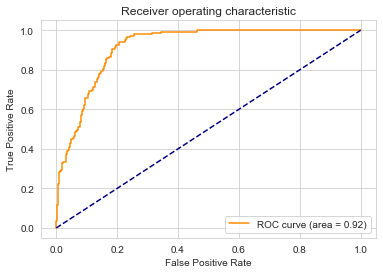

In [63]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

when the model is built using K-NN, the accuracy on the training data is 100% and on the test data it is 90.3% but 100% on train data 
indicates that the model is overfitted that means varience error is high so we can not conclude it as a good model.

when the model is built using logistic regression, the accuracy on the training data is 90.9% and on the test data it is 90.7%.
also it shown a good AUC of 92% and F1 score of 89.3%

when the model is built using naive bayes, the accuracy on the training data is 89.4% and on the test data it is 88.3%.
also it shown a good AUC of 92% and F1 score of 88.9%

on comparing all the models, i can conclude that logistic regression is the best model to predict the likelihood of a liability customer buying personal loans 
as its F1 score and  accuracy on test and train is good.

